# Data Python IPSSI

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from classes.Question import Question
from classes.Chart import Chart
# Gestion Warning Jupiter Anaconda
pd.options.mode.chained_assignment = None

## Importation du `DataSet`

In [5]:
dataframe_global = pd.read_csv("articles_data.csv")

## Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?

### Fonction pour avoir le resultat (sans graphique) :

In [234]:
# Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?
def resultHighlightinArticleGenerateMoreEngagement(data, instanceObject):

    # Récupération des top articles
    top_article = data[data.top_article == 1]

    # Calcule du pourcentage de top articles par rapport au total d'article
    pourcent_top_article = len(top_article) / len(data) * 100

    # Sum total des articles sur reaction / share / comment
    sum_article_reaction = data.engagement_reaction_count.sum()
    sum_article_share = data.engagement_share_count.sum()
    sum_article_comment = data.engagement_comment_count.sum()

    # Sum des top articles sur reaction / share / comment
    sum_top_article_reaction = top_article.engagement_reaction_count.sum()
    sum_top_article_share = top_article.engagement_share_count.sum()
    sum_top_article_comment = top_article.engagement_comment_count.sum()

    # Pourcentage des sum
    instanceObject.temp_variable['pourcent_top_reaction'] = sum_top_article_reaction / sum_article_reaction * 100
    instanceObject.temp_variable['pourcent_top_share'] = sum_top_article_share / sum_article_share * 100
    instanceObject.temp_variable['pourcent_top_comment'] = sum_top_article_comment / sum_article_comment * 100

    print("Pourcentage des articles en top : " + str(round(pourcent_top_article, 2)) + "%")

    print("\n")

    print("Pourcentage des reactions des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_reaction'], 2)) + "%")
    print("Pourcentage des partages des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_share'], 2)) + "%")
    print("Pourcentage des commentaires des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_comment'], 2)) + "%")
    
    print("\n")

### Fonction pour avoir le resultat (Graphique) :

In [235]:
def graphicHighlightinArticleGenerateMoreEngagement(data, instanceObject) :
    # REACTIONS
    pourcent_top_reaction = instanceObject.temp_variable['pourcent_top_reaction']
    pourcent_top_share = instanceObject.temp_variable['pourcent_top_share']
    pourcent_top_comment = instanceObject.temp_variable['pourcent_top_comment']

    title_reaction = "Pourcentage des reactions en top article"
    datas_reaction = [100-pourcent_top_reaction, pourcent_top_reaction]
    labels_reaction = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_reaction, datas_reaction, labels_reaction, explode)

    # SHARE
    title_share = "Pourcentage des partages en top article"
    datas_share = [100-pourcent_top_share, pourcent_top_share]
    labels_share = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_share, datas_share, labels_share, explode)

    # COMMENT
    title_comment = "Pourcentage des commentaires en top article"
    datas_comment = [100-pourcent_top_comment, pourcent_top_comment]
    labels_comment = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_comment, datas_comment, labels_comment, explode)

### Réponse : * (Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?) *

Pourcentage des articles en top : 12.21%


Pourcentage des reactions des top articles : 23.99%
Pourcentage des partages des top articles : 35.58%
Pourcentage des commentaires des top articles : 28.15%




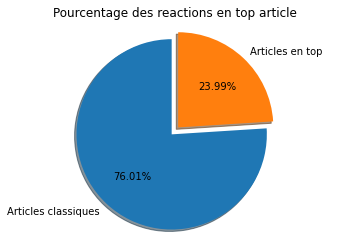

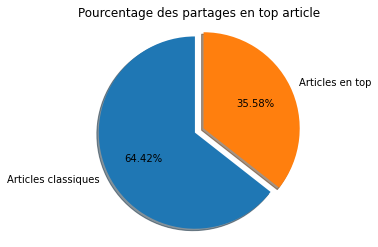

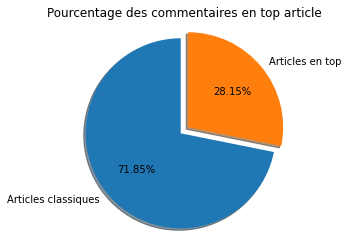

In [236]:
highlightinArticleGenerateMoreEngagement = Question('Est-ce que la mise en avant d\'un article sur le site produit plus d\'engagement ?', \
    dataframe_global, \
    resultHighlightinArticleGenerateMoreEngagement, \
    graphicHighlightinArticleGenerateMoreEngagement \
)

highlightinArticleGenerateMoreEngagement.showResult()
highlightinArticleGenerateMoreEngagement.showGraphic()

## Quel pourcentage d'articles likés est également partagés

### Fonction pour avoir le resultat (sans graphique) :

In [237]:
# Quel pourcentage d'articles likés est également partagés
def resultPercentageLikedItems(data, instanceObject):
    data.fillna(0)
    # df = df.drop(750)
    data.published_at = pd.to_datetime(data.published_at)
    # nombre d'article total
    instanceObject.temp_variable['nbArticle'] = len(data)
    # nombre d'article liké
    instanceObject.temp_variable['nbArticleLike'] = len(data.query('engagement_reaction_count > 0'))
    # nombre d'article liké et partagé
    nbArticleLikeAndShare = len(data.query('engagement_reaction_count > 0 \
                                          and engagement_share_count > 0'))
    # nombre d'article liké et commenté
    nbArticleLikeAndComment = len(data.query('engagement_reaction_count > 0 \
                                            and engagement_comment_count > 0'))
    # nombre d'article liké, partagé et commenté
    nbArticleLikeAndShareAndComment = len(data.query('engagement_reaction_count > 0 \
                                                    and engagement_share_count > 0 \
                                                    and engagement_comment_count > 0'))
    

### Fonction pour avoir le resultat (Graphique) :

In [238]:
def graphicPercentageLikedItems(data, instanceObject):
    nbArticle = instanceObject.temp_variable['nbArticle']
    nbArticleLike = instanceObject.temp_variable['nbArticleLike']
    
    pctLike = pd.Series([nbArticleLike / nbArticle * 100], index = ['Like'])

    title_article_likes = 'Pourcentage des articles likés'
    datas_article_likes = [nbArticleLike / nbArticle * 100, 100 - (nbArticleLike / nbArticle * 100)]
    labels_article_likes = ['Articles likés', 'Articles non likés']
    explode_article_likes = [0.1,0]

    Chart.createPieChart(title_article_likes, datas_article_likes, labels_article_likes, explode_article_likes)

### Réponse : * (Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?) *

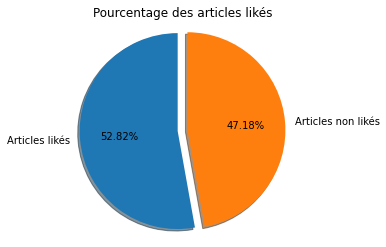

In [240]:
percentageLikedItems = Question('Quel est le pourcentage d\'articles likés ?', \
    dataframe_global, \
    resultPercentageLikedItems, \
    graphicPercentageLikedItems \
)

percentageLikedItems.showResult()
percentageLikedItems.showGraphic()

## Quel est le pourcentage d'articles likés selon les engagements ?

### Fonction pour avoir le resultat (sans graphique) :

In [241]:
def resultPercentageLikedItemsEquallyShared(data, instanceObject):
    # nombre d'article liké et partagé
    instanceObject.temp_variable['nbArticleLikeAndShare'] = len(data.query('engagement_reaction_count > 0 \
                                          and engagement_share_count > 0'))
    # nombre d'article liké et commenté
    instanceObject.temp_variable['nbArticleLikeAndComment'] = len(data.query('engagement_reaction_count > 0 \
                                            and engagement_comment_count > 0'))
    # nombre d'article liké, partagé et commenté
    instanceObject.temp_variable['nbArticleLikeAndShareAndComment'] = len(data.query('engagement_reaction_count > 0 \
                                                    and engagement_share_count > 0 \
                                                    and engagement_comment_count > 0'))

### Fonction pour avoir le resultat (Graphique) :

In [242]:
def graphicPercentageLikedItemsEquallyShared(data, instanceObject):
    nbArticle = instanceObject.temp_variable['nbArticle']
    nbArticleLike = instanceObject.temp_variable['nbArticleLike']
    nbArticleLikeAndShare = instanceObject.temp_variable['nbArticleLikeAndShare']
    nbArticleLikeAndComment = instanceObject.temp_variable['nbArticleLikeAndComment']
    nbArticleLikeAndShareAndComment = instanceObject.temp_variable['nbArticleLikeAndShareAndComment']
    
    title = 'Pourcentage des articles selon les engagements'

    datas = [
            nbArticleLikeAndShare / nbArticleLike * 100,
            nbArticleLikeAndComment / nbArticleLike * 100,
            nbArticleLikeAndShareAndComment / nbArticleLikeAndShare * 100
    ]

    labels = [
                'Like & Share',
                'Like & Comment',
                'Like & Share & Comment'
    ]

    colors = ['#fe4a49','#2ab7ca','#fed766']

    Chart.createBarHChart(title, datas, labels, colors)

### Réponse : * (Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?) *

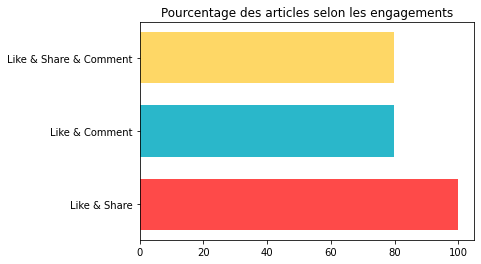

In [243]:
percentageLikedItemsEquallyShared = Question('Quel est le pourcentage d\'articles likés selon les engagements ?', \
    dataframe_global, \
    resultPercentageLikedItemsEquallyShared, \
    graphicPercentageLikedItemsEquallyShared \
)

percentageLikedItemsEquallyShared.showResult()
percentageLikedItemsEquallyShared.showGraphic()

## Quel est le pourcentage d'article signé par un/des auteur(s)?

### Fonction pour avoir le resultat (sans graphique) :

In [244]:
# Quel est le pourcentage d'article signé par un/des auteur(s)?
def resultPercentageArticlesSignedByAuthor(data, instanceObject):
    dfWithoutNaNAuthor = data[data['author'].notnull()]

    dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.source_name not in x.author, axis=1)]
    dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.author not in x.source_name, axis=1)]

    keywordBanned = ('The', 'http', 'BBC', 'ABC', 'CBS', 'WSJ Staff')

    dfWithoutNaNAuthor = dfWithoutNaNAuthor[~dfWithoutNaNAuthor.author.str.startswith(keywordBanned)]

    count = dfWithoutNaNAuthor['author'].str.split().str.len()
    dfWithAuthor = dfWithoutNaNAuthor[~(count==1)]

    dfWithoutAuthorSign = data[~data.index.isin(dfWithAuthor.index)]

    nbTotalArticle = len(data)
    nbTotalArticleSigne = len(dfWithAuthor)
    nbTotalArticleNonSigne = len(dfWithoutAuthorSign)

    instanceObject.temp_variable['pctArticleSigne'] = round(nbTotalArticleSigne / nbTotalArticle * 100,2)
    instanceObject.temp_variable['pctArticleNonSigne'] = round(nbTotalArticleNonSigne / nbTotalArticle * 100,2)

    dfWithAuthor['nb_engagement'] = dfWithAuthor['engagement_reaction_count'] \
                                    + dfWithAuthor['engagement_comment_count'] \
                                    + dfWithAuthor['engagement_share_count'] \
                                    + dfWithAuthor['engagement_comment_plugin_count']

    dfWithoutAuthorSign['nb_engagement'] = dfWithoutAuthorSign['engagement_reaction_count'] \
                                        + dfWithoutAuthorSign['engagement_comment_count'] \
                                        + dfWithoutAuthorSign['engagement_share_count'] \
                                        + dfWithoutAuthorSign['engagement_comment_plugin_count']

    instanceObject.temp_variable['nbEngagementSigne'] = dfWithAuthor.nb_engagement.sum()
    instanceObject.temp_variable['nbEngagementNonSigne'] = dfWithoutAuthorSign.nb_engagement.sum()

    instanceObject.temp_variable['nbTotalEngagementArticle'] = data['engagement_reaction_count'].sum() \
                            + data['engagement_comment_count'].sum() \
                            + data['engagement_share_count'].sum() \
                            + data['engagement_comment_plugin_count'].sum()


### Fonction pour avoir le resultat (Graphique) :

In [245]:
def graphicPercentageArticlesSignedByAuthor(data, instanceObject):
    pctArticleSigne = instanceObject.temp_variable['pctArticleSigne']
    pctArticleNonSigne = instanceObject.temp_variable['pctArticleNonSigne']
    nbEngagementSigne = instanceObject.temp_variable['nbEngagementSigne']
    nbEngagementNonSigne = instanceObject.temp_variable['nbEngagementNonSigne']
    nbTotalEngagementArticle = instanceObject.temp_variable['nbTotalEngagementArticle']
    
    title = 'Pourcentage des articles signés'
    datas_articles = [pctArticleSigne, pctArticleNonSigne]
    datas_labels = ['Articles signés', 'Articles non signés']
    explode = [0.1,0]

    Chart.createPieChart(title, datas_articles, datas_labels, explode)

    pctEngagementArticleSigne = round(nbEngagementSigne / nbTotalEngagementArticle * 100,2)
    pctEngagementArticleNonSigne = round(nbEngagementNonSigne / nbTotalEngagementArticle * 100,2)

    title = 'Pourcentage des actions'
    datas_reaction = [pctEngagementArticleSigne, pctEngagementArticleNonSigne]
    Chart.createPieChart(title, datas_reaction, datas_labels, explode)


### Réponse : * (Quel est le pourcentage d'article signé par un auteur(s)?) *

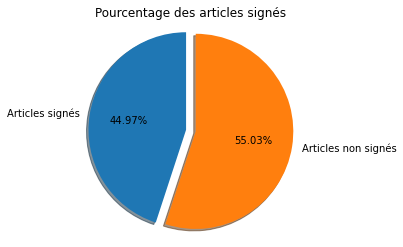

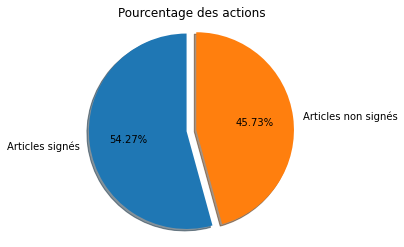

In [246]:
percentageArticlesSignedByAuthor = Question('Quel est le pourcentage d\'article signé par un/des auteur(s)?', \
    dataframe_global, \
    resultPercentageArticlesSignedByAuthor, \
    graphicPercentageArticlesSignedByAuthor \
)

percentageArticlesSignedByAuthor.showResult()
percentageArticlesSignedByAuthor.showGraphic()

## Quand est-ce que l'on récolte le plus de likes, partages et commentaires ?

## A) Par tranche horaire

### Manipulation du DataSet pour travailler sur le `published_at`

In [247]:
def addTrancheHoraire(datas) :
    """ Ajoute la colonne `tranche_horaire` à la dataframe """
    dataframe_converted_datetime = datas

    # Conversion de `published_at` en DateTime
    dataframe_converted_datetime.published_at = pd.to_datetime(dataframe_converted_datetime.published_at)
    #dataframe_converted_datetime.published_at.dtypes # Afficher le type de `published_at`

    # Ligne 750 corrompue
    dataframe_converted_datetime = dataframe_converted_datetime.drop(index=750)
    # Réindexation
    dataframe_converted_datetime.index = [i for i in range(0, len(dataframe_converted_datetime))] 

    # Pour retrouver les lignes dont le `published_at` == NaN
    #dataframe_converted_datetime[dataframe_converted_datetime.published_at.isnull()]

    # Ajout d'une nouvelle colonne pour avoir les différentes tranches horaires
    serie_temp = pd.Series(
        [ int(df_datetime.hour) for df_datetime in dataframe_converted_datetime.published_at ],  
        name='tranche_horaire'
    )

    return pd.concat(
        [dataframe_converted_datetime, serie_temp],
        axis=1,
        ignore_index=False
    )

### Nombre de `Post` par tranche horaire

In [248]:
def getNbPostByHour(datas) :
    """ Obtenir le nombre d'articles postés par tranche horaire """
    return datas.groupby(['tranche_horaire']) \
                                .size() \
                                .reset_index(name='counts') \
                                .sort_values('counts', ascending=False)

### Nombre de `Réaction` par tranche horaire

In [249]:
def getNbReactionByHour(datas) :
    """ Obtenir le nombre de 'REACTION' par tranche horaire """
    return datas.groupby(['tranche_horaire']) \
                                .engagement_reaction_count \
                                .sum() \
                                .reset_index(name='sum_like') \
                                .sort_values('sum_like', ascending=False)

### Nombre de `Partage` par tranche horaire

In [250]:
def getNbShareByHour(datas) :
    """ Obtenir le nombre de 'PARTAGE' par tranche horaire """
    return datas.groupby(['tranche_horaire']) \
                                .engagement_share_count \
                                .sum() \
                                .reset_index(name='sum_share') \
                                .sort_values('sum_share', ascending=False)

### Nombre de `Commentaire` par tranche horaire

In [251]:
def  getNbCommentByHour(datas) :
    """ Obtenir le nombre de 'COMMENTAIRE' par tranche horaire """
    return datas.groupby(['tranche_horaire']) \
                                .engagement_comment_count \
                                .sum() \
                                .reset_index(name='sum_comment') \
                                .sort_values('sum_comment', ascending=False)

### Fonction qui permettra de répondre à la question

In [252]:
def resultEngagementsByHour(datas, instanceObject) :
    """ Affichage des engagements en fonction des tranches horaires """
    datas = addTrancheHoraire(datas)

    instanceObject.data = addTrancheHoraire(datas)
    instanceObject.temp_variable['nb_post_by_hours'] = getNbPostByHour(datas)
    instanceObject.temp_variable['nb_reaction_by_hours'] = getNbReactionByHour(datas)
    instanceObject.temp_variable['nb_share_by_hours'] = getNbShareByHour(datas)
    instanceObject.temp_variable['nb_comment_by_hours'] = getNbCommentByHour(datas)

    print("Nombre de post par heure :")
    print(instanceObject.temp_variable['nb_post_by_hours'])

    print("\nNombre de reactions par heure :")
    print(instanceObject.temp_variable['nb_reaction_by_hours'])

    print("\nNombre de partages par heure :")
    print(instanceObject.temp_variable['nb_share_by_hours'])

    print("\nNombre de commentaires par heure :")
    print(instanceObject.temp_variable['nb_comment_by_hours'])

### Réponse : *(Quelle est la tranche horaire où l'on obtient le plus de likes, partages, commentaires ?)*

In [253]:
engagementsByHour = Question('Quelle est la tranche horaire où l\'on obtient le plus de likes, partages, commentaires ?', \
    dataframe_global, \
    resultEngagementsByHour, \
    None \
)

engagementsByHour.showResult()

Nombre de post par heure :
    tranche_horaire  counts
16               16    1460
15               15    1432
14               14    1237
17               17    1003
13               13     918
12               12     837
11               11     716
10               10     533
9                 9     526
18               18     324
8                 8     248
5                 5     194
0                 0     173
7                 7     164
4                 4     137
6                 6     125
2                 2     116
1                 1     113
19               19     105
3                 3      75

Nombre de reactions par heure :
    tranche_horaire  sum_like
10               10  517434.0
15               15  443402.0
14               14  406498.0
13               13  362689.0
12               12  284878.0
16               16  265871.0
11               11  248854.0
17               17  234314.0
9                 9  199809.0
5                 5  189613.0
1                 1  1

## B) Par moment de la journée

_Horaire_ :
* **Matin** :       *8h à 11h*
* **Midi** :        *11h à 14h*
* **Après-midi** :  *14h à 19h*
* **Soir** :        *19h à 00h*
* **Nuit** :        *00h à 8h*

### Fonction pour filtrer les différentes périodes de la journée

In [254]:
def periodOfTheDay(hour) :
    if (hour >= 0 and hour < 8) :
        return 'night'
    elif (hour < 11) :
        return 'morning'
    elif (hour < 14) :
        return 'midday'
    elif (hour < 19) :
        return 'afternoon'
    else :
        return 'evening'

### Regroupement `Réaction` par période

In [255]:
def getNbReactionByPeriod(datas) :
    """ Obtenir les reactions par moment de la journée """

    nb_reaction_by_period = getNbReactionByHour(datas)
    nb_reaction_by_period.columns = ['period', 'reactions']
    nb_reaction_by_period.period = nb_reaction_by_period \
                                    .period \
                                    .apply(periodOfTheDay) \

    return nb_reaction_by_period.groupby(['period']) \
                            .sum() \
                            .sort_values('reactions', ascending=False)

### Regroupement `Partage` par période

In [256]:
def getNbShareByPeriod(datas) :
    """ Obtenir les partages par moment de la journée """

    nb_share_by_period = getNbShareByHour(datas)
    nb_share_by_period.columns = ['period', 'shares']
    nb_share_by_period.period = nb_share_by_period \
                                    .period \
                                    .apply(periodOfTheDay) \

    return nb_share_by_period.groupby(['period']) \
                            .sum() \
                            .sort_values('shares', ascending=False)

### Regroupement `Commentaire` par période

In [257]:
def getNbCommentByPeriod(datas) :
    """ Obtenir les commentaires par moment de la journée """

    nb_comment_by_period = getNbCommentByHour(datas)
    nb_comment_by_period.columns = ['period', 'comments']
    nb_comment_by_period.period = nb_comment_by_period \
                                    .period \
                                    .apply(periodOfTheDay) \

    return nb_comment_by_period.groupby(['period']) \
                            .sum() \
                            .sort_values('comments', ascending=False)

### Fonction qui permettra de répondre à la question

In [258]:
def resultEngagementsByPeriod(datas, instanceObject) :
    """ Affichage des engagements en fonction dela période de la journée"""
    datas = addTrancheHoraire(datas)

    instanceObject.data = addTrancheHoraire(datas)
    instanceObject.temp_variable['nb_reaction_by_period'] = getNbReactionByPeriod(datas)
    instanceObject.temp_variable['nb_share_by_period'] = getNbShareByPeriod(datas)
    instanceObject.temp_variable['nb_comment_by_period'] = getNbCommentByPeriod(datas)

    print("\nNombre de reactions par période :")
    print(instanceObject.temp_variable['nb_reaction_by_period'])

    print("\nNombre de partages par période :")
    print(instanceObject.temp_variable['nb_share_by_period'])

    print("\nNombre de commentaires par période :")
    print(instanceObject.temp_variable['nb_comment_by_period'])

### Réponse : (Quelle est la période de la journée où l'on obtient le plus de likes, partages, commentaires ?)

In [259]:
engagementsByPeriod = Question('Quelle est la période de la journée où l\'on obtient le plus de likes, partages, commentaires ?', \
    dataframe_global, \
    resultEngagementsByPeriod, \
    None \
)

engagementsByPeriod.showResult()


Nombre de reactions par période :
           reactions
period              
afternoon  1379412.0
midday      896421.0
night       872343.0
morning     786114.0
evening       1328.0

Nombre de partages par période :
              shares
period              
afternoon  1128462.0
midday      413611.0
night       247861.0
morning     210661.0
evening      24367.0

Nombre de commentaires par période :
           comments
period             
afternoon  501403.0
midday     317860.0
night      256784.0
morning    203440.0
evening       409.0


In [2]:
## L'engagement par mots

In [1]:
### Statistiques par mots choisis par l'utilisateur

> Ex: "Car, Plane, July, Biden, Mexico"


SyntaxError: invalid syntax (<ipython-input-1-4ceee7b99ab9>, line 3)

Which word would you like to have stats on ? Comma-separated list, ex: "Trump, Biden" (leave empty to have full stats) 
Car, Plane, July, Biden, Mexico


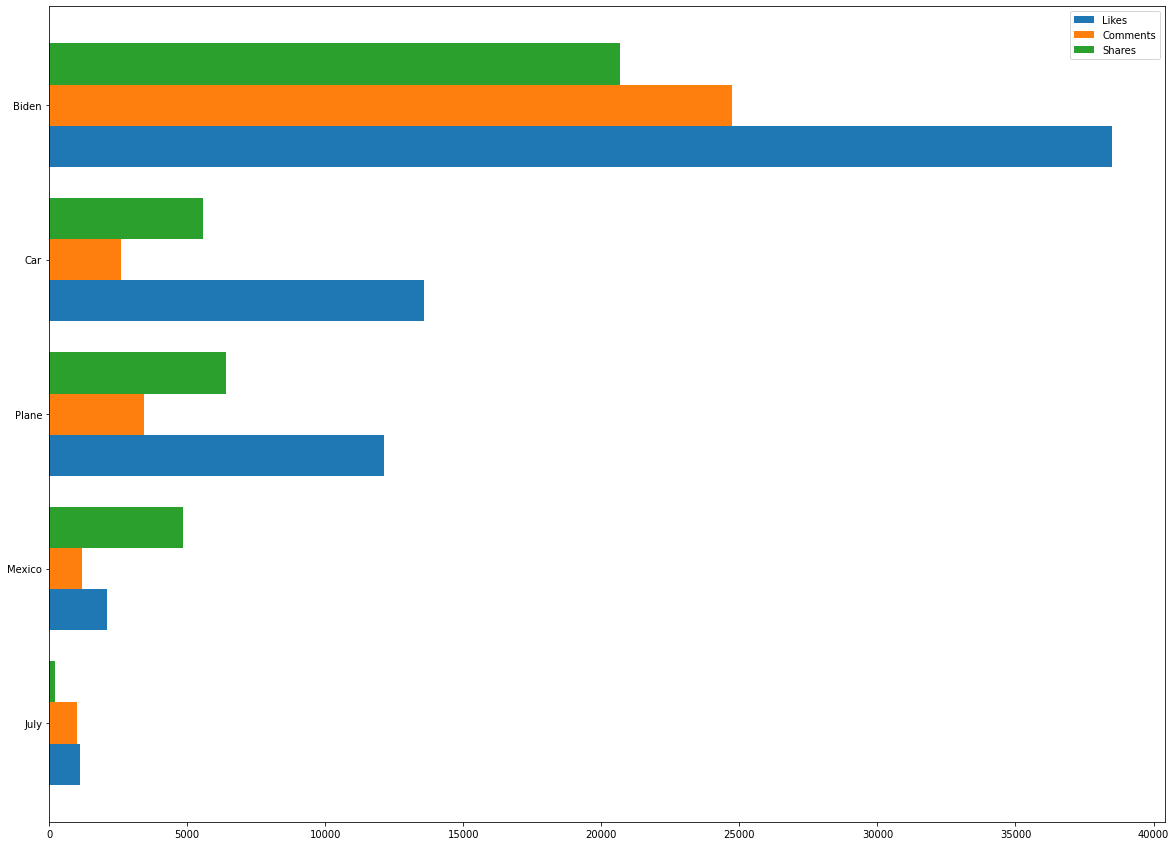

In [8]:
def getUserWordList():
    clean_word_list = [];
    user_word_list = input('Which word would you like to have stats on ? Comma-separated list, ex: "Trump, Biden" (leave empty to have full stats) \n')

    if len(user_word_list) == 0:
        return False

    for word in user_word_list.split(','):
        clean_word_list.append(cleanUpWord(word))

    return clean_word_list

def cleanUpWord(word):
    return word.strip()

def getMatchsTitleWord(data_frame, word):
    # les mots dont les caractères précédents et suivans ne sont pas des lettres
    word_regex = '(?:^|\W)' + word + '(?:$|\W)'

    return data_frame[data_frame['title'].str.contains(
        word_regex, case=False, regex=True, na=False)]

def getNumberOfLikes(data_frame):
    return data_frame['engagement_reaction_count'].sum()

def getNumberOfComments(data_frame):
    return data_frame['engagement_comment_count'].sum()

def getNumberOfShares(data_frame):
    return data_frame['engagement_share_count'].sum()

def getSliceToShow(parameters):
    switcher = {
            'first': [None, parameters['quantity_to_show'], parameters['steps_to_apply']],
            'last' : [-parameters['quantity_to_show'], None, parameters['steps_to_apply']]
    }
    start, stop, step = switcher.get(parameters['position_to_show'], [None, 30, 1])

    return slice(start, stop, step)

def getAppParameters(user_args):
    try:
        quantity_to_show = user_args[0]
        position_to_show = user_args[1]
        steps_to_apply = user_args[2]
    except IndexError:
        quantity_to_show = 30
        position_to_show = 'first'
        steps_to_apply = 1

    return {'quantity_to_show': int(quantity_to_show),
            'position_to_show': position_to_show,
            'steps_to_apply': int(steps_to_apply)}


word_list = getUserWordList()
dict_result = {}

if word_list:
    for word in word_list:
        new_data_frame = getMatchsTitleWord(dataframe_global, word)

        likes = getNumberOfLikes(new_data_frame)
        comments = getNumberOfComments(new_data_frame)
        shares = getNumberOfShares(new_data_frame)

        dict_result[word] = [likes, comments, shares]
else:
    print('Please provide words.')
        
category_names = ['Likes', 'Comments', 'Shares']
results = dict(sorted(dict_result.items(), key=lambda v: v[1][0], reverse=True))

words = []
likes = []
comments = []
shares = []

labels = ['Likes', 'Comments', 'Shares']

parameters = getAppParameters([30, 'first', 1])
slices = getSliceToShow(parameters)

for key,value in list(results.items())[slices]:
    words.append(key)
    likes.append(value[0])
    comments.append(value[1])
    shares.append(value[2])

Chart.drawHorizontalThreeBarsChart(words, [likes, comments, shares], labels)


### Statistiques sur tous les mots du dataset

#### Les 20 mots les plus "likés" + stats sur les comments/shares

Processing 8741 words...


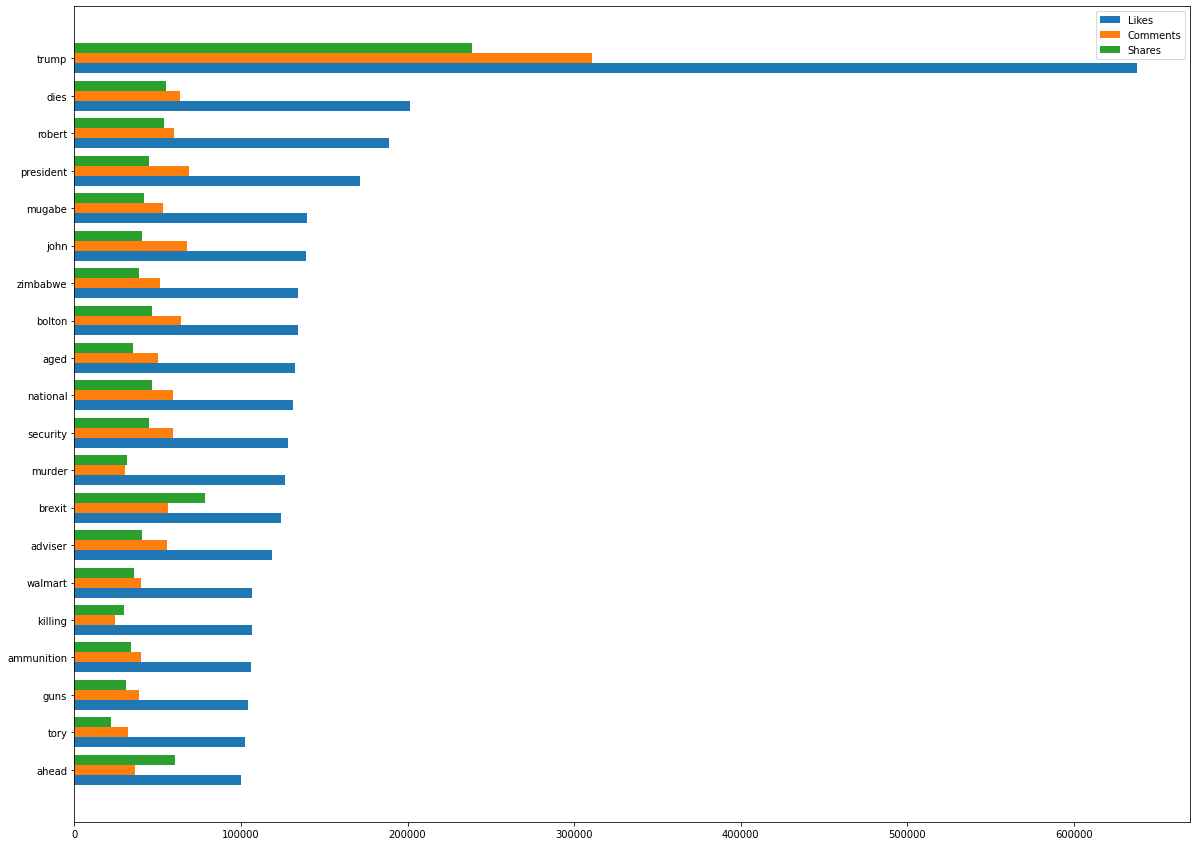

8741 words proceeded in 6.496758222579956 seconds


In [11]:
%run -i './utilities/word_stats.py' 20 first 1

#### Les 20 mots les moins likés  + stats sur les comments/shares

Processing 8741 words...


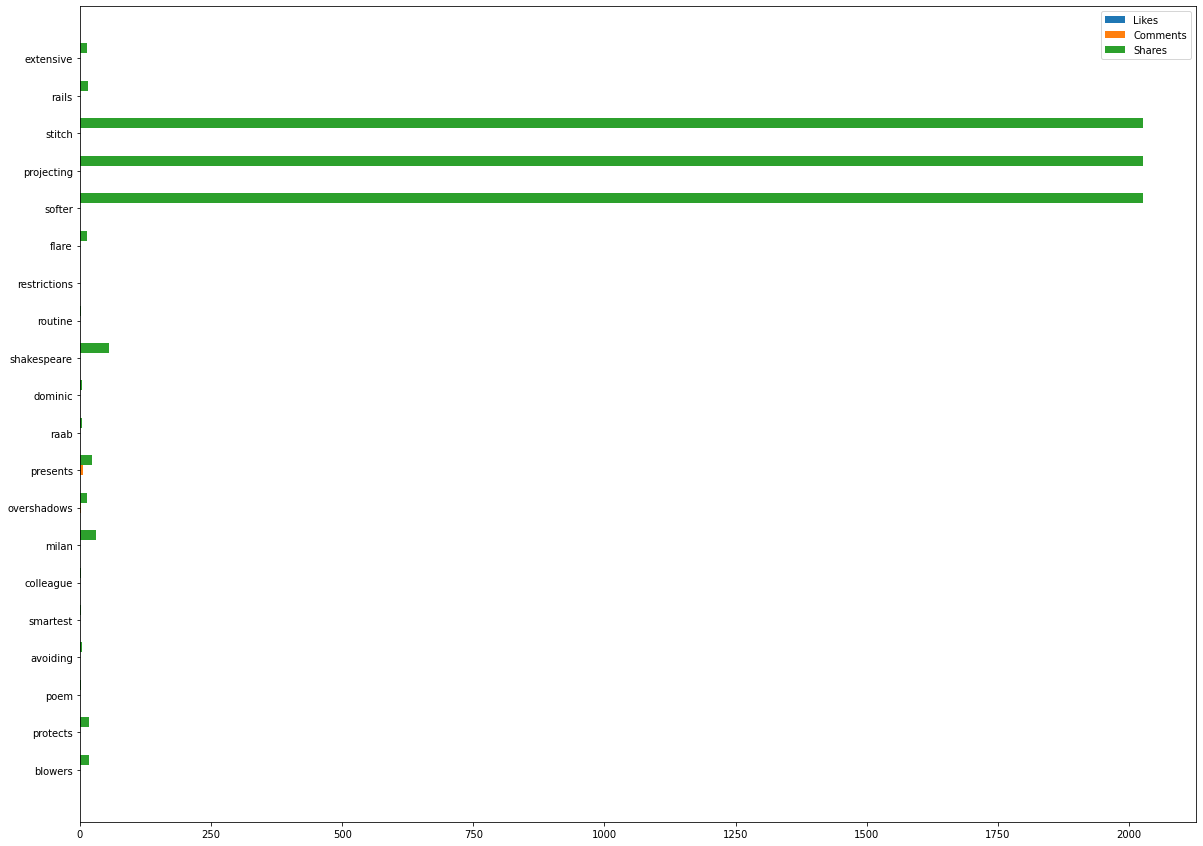

8741 words proceeded in 6.305886507034302 seconds


In [13]:
%run -i './utilities/word_stats.py' 20 last 1

#### Les 300 mots les plus likés, uniquement chaque vingtième mot

Processing 8741 words...


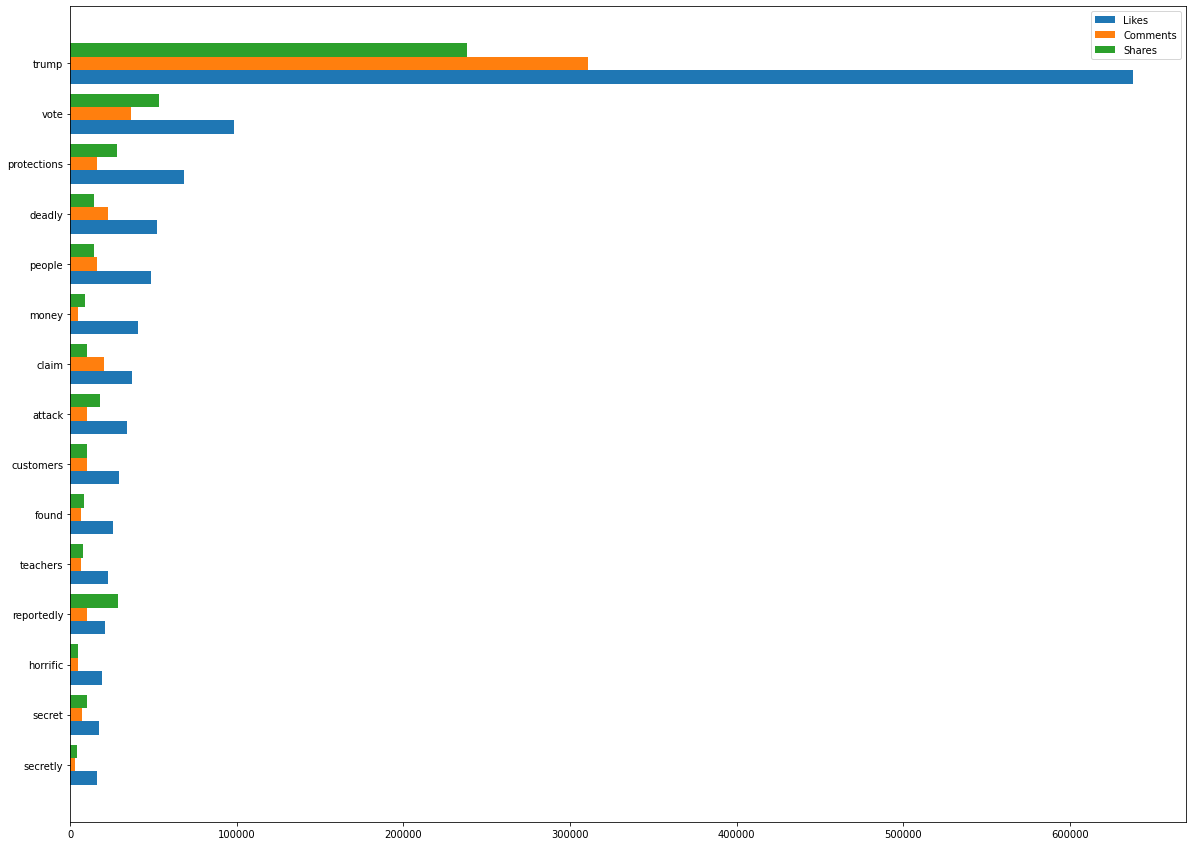

8741 words proceeded in 9.837143182754517 seconds


In [15]:
%run -i './utilities/word_stats.py' 300 first 20

#### Les 300 mots les moints likés, uniquement chaque vingtième mot

Processing 8741 words...


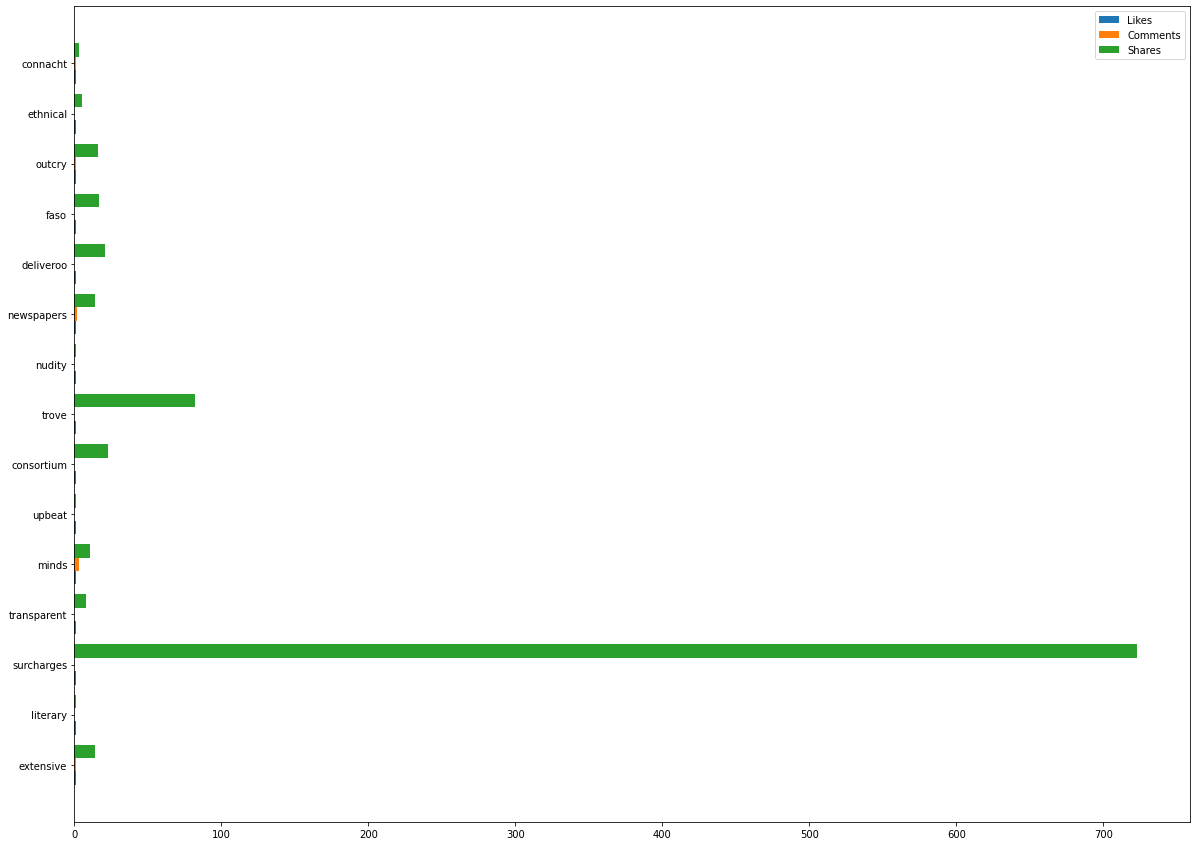

8741 words proceeded in 9.878085613250732 seconds


In [17]:
%run -i './utilities/word_stats.py' 300 last 20

In [2]:
## Les revues les plus likées, commentées, et partagées

In [6]:
dataframe_global['reactions_count'] = dataframe_global['engagement_reaction_count'] + dataframe_global['engagement_comment_count'] + dataframe_global['engagement_share_count']

In [7]:
#Afficher les revues les plus likées, commentées, et partagées
dataframe_global.groupby(by=["source_name"]).sum('reactions_count').sort_values(by = ['reactions_count'], ascending = False)

,index,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,reactions_count
source_name,,,,,,,
CNN,6014570,112.0,1218206.0,344894.0,327778.0,30.0,1890878.0
The New York Times,5230836,83.0,790449.0,216373.0,241740.0,0.0,1248562.0
BBC News,6513254,122.0,545396.0,207558.0,200636.0,0.0,953590.0
CBS News,5160334,139.0,459741.0,170960.0,108155.0,0.0,738856.0
Reuters,6544558,139.0,16963.0,7101.0,647095.0,0.0,671159.0
Business Insider,5689617,133.0,216545.0,101292.0,311678.0,80.0,629515.0
ABC News,6013928,132.0,343779.0,102708.0,82662.0,1.0,529149.0
Al Jazeera English,2699396,39.0,140410.0,46005.0,36031.0,9.0,222446.0
The Wall Street Journal,1741475,128.0,84124.0,40065.0,33173.0,0.0,157362.0


In [8]:
## Les  revues les moins likées, commentées, et partagées

In [9]:
#Afficher les  revues les moins likées, commentées, et partagées
dataframe_global.groupby(by=["source_name"]).sum('reactions_count').sort_values(by = ['reactions_count'], ascending = True)

,index,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,reactions_count
source_name,,,,,,,
460.0,750,0.0,0.0,0.0,0.0,0.0,0.0
ESPN,440122,82.0,0.0,0.0,0.0,0.0,0.0
The Irish Times,6448158,129.0,26838.0,10514.0,6947.0,0.0,44299.0
Newsweek,1963268,36.0,93167.0,32426.0,29067.0,0.0,154660.0
The Wall Street Journal,1741475,128.0,84124.0,40065.0,33173.0,0.0,157362.0
Al Jazeera English,2699396,39.0,140410.0,46005.0,36031.0,9.0,222446.0
ABC News,6013928,132.0,343779.0,102708.0,82662.0,1.0,529149.0
Business Insider,5689617,133.0,216545.0,101292.0,311678.0,80.0,629515.0
Reuters,6544558,139.0,16963.0,7101.0,647095.0,0.0,671159.0


## Présentation graphique

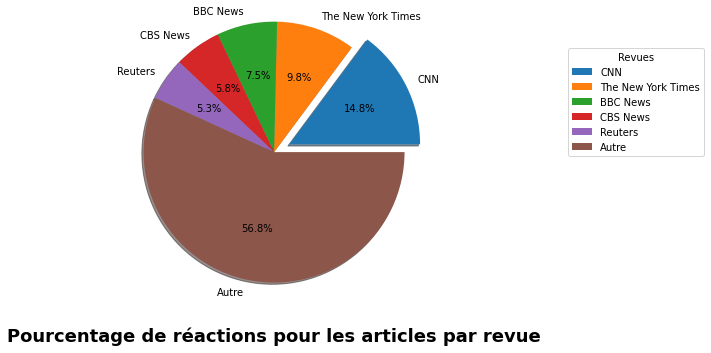

In [12]:
tab1 = dataframe_global.groupby(by=["source_name"]).sum('reactions_count').sort_values(by = ['reactions_count'], ascending = False).head(5)
tab2 = dataframe_global.groupby(by=["source_name"]).sum('reactions_count').sort_values(by = ['reactions_count'], ascending = False)[5:]
autre = dataframe_global['reactions_count'].sum()
valuesStat = list(tab1['reactions_count'])
valuesStat.append(autre)
labels = list(tab1.index)
labels.append('Autre')
explode = (0.2, 0, 0, 0, 0, 0)  # only "explode" the biggest revue
plt.title('Pourcentage de réactions pour les articles par revue', fontdict={'fontweight':'bold', 'fontsize':18}, y=-0.4)
plt.pie(valuesStat, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, radius=1.5)
plt.legend(labels, title="Revues", bbox_to_anchor=(1, 0, 1.5, 1))
plt.show()